# Лабораторная работа "Построение эллипса Петунина"


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline

## Получение входных данных

In [2]:
def random_data(x_limits, y_limits, N):
    """
    Функция создает массив точек на плоскости в заданных ограничениях 
    с равномерным распределением
    ограничения (x_limits, y_limits) заданы в виде (x_min, x_max)
    Размер выходного массива (2,N)
    """
    
    return np.hstack((np.random.uniform(x_limits[0], x_limits[1], (N,1)),
                     np.random.uniform(y_limits[0], y_limits[1], (N,1))))
def text_data(filename):
    """
    Чтение данных из файла
    """
#     TODO

In [3]:
random_data((-1,0),(0,1), 3)

array([[-0.87030472,  0.34389209],
       [-0.99315138,  0.7798838 ],
       [-0.98122862,  0.1298923 ]])

In [4]:
def first_pic(data, x_limits, y_limits, size =7, title = ""):
    """
    Рисует только полученные точки
    """
    fig, ax = plt.subplots(figsize = (size * abs(x_limits[0] - x_limits[1]), size * abs(y_limits[0] - y_limits[1])))
    ax.set_title(title, fontsize=size*3)
    ax.set_xlim(*x_limits)
    ax.set_ylim(*y_limits)
    ax.scatter(data[:,0],data[:,1])

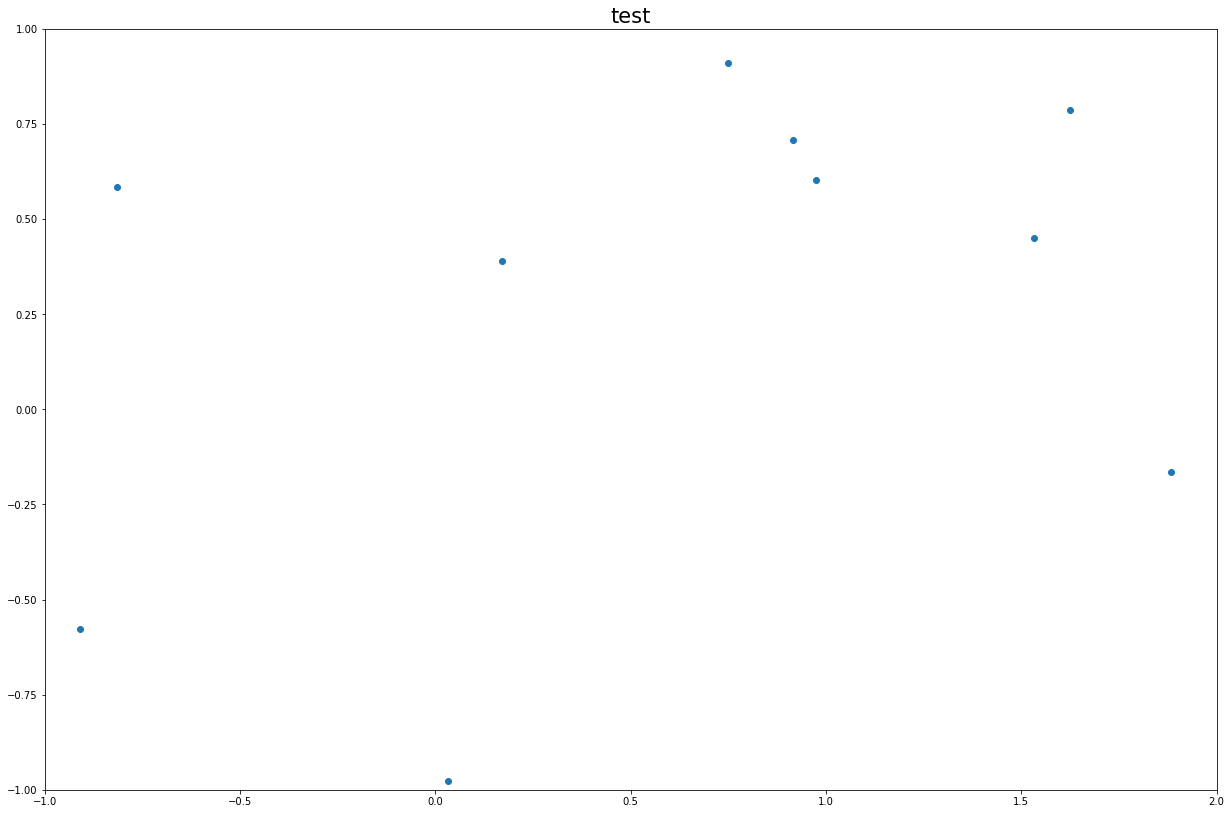

In [5]:
x_lim = (-1,2)
y_lim = (-1,1)
N = 10
data = random_data(x_lim,y_lim,N)
first_pic(data, x_lim, y_lim, title = 'test')

In [6]:
def distance(dot1, dot2):
    """
    функция расстояния между точками
    """
#     print(np.sqrt(np.sum((dot1- dot2)**2)))
    return np.sqrt(np.sum((dot1- dot2)**2))

def max_distance(data):
    """
    Функция ищет индексы точек, между которыми максимальное расстояние
    """
    max_val = 0
    index = [0,0]
    for in1, dot1 in enumerate(data):
        for in2, dot2 in enumerate(data):
            if distance(dot1, dot2)> max_val:
                max_val = distance(dot1, dot2)
                index = [in1, in2]
    # сортируем индексы по х
    return sorted(index, key = lambda ind: data[ind,0])

In [7]:
index = max_distance(data)
index

[1, 3]

In [8]:
def second_pic(data, x_limits, y_limits, index_max,  size =7, title = ""):
    """
    Рисует полученные точки и отрезок, котрый соединяет самые отдаленные точки
    """
    fig, ax = plt.subplots(figsize = (size * abs(x_limits[0] - x_limits[1]), size * abs(y_limits[0] - y_limits[1])))
    ax.set_title(title, fontsize=size*3)
    ax.set_xlim(*x_limits)
    ax.set_ylim(*y_limits)
    ax.scatter(data[:,0],data[:,1])
    ax.plot([data[index_max[0],0], data[index_max[1],0]], [data[index_max[0],1], data[index_max[1],1]])

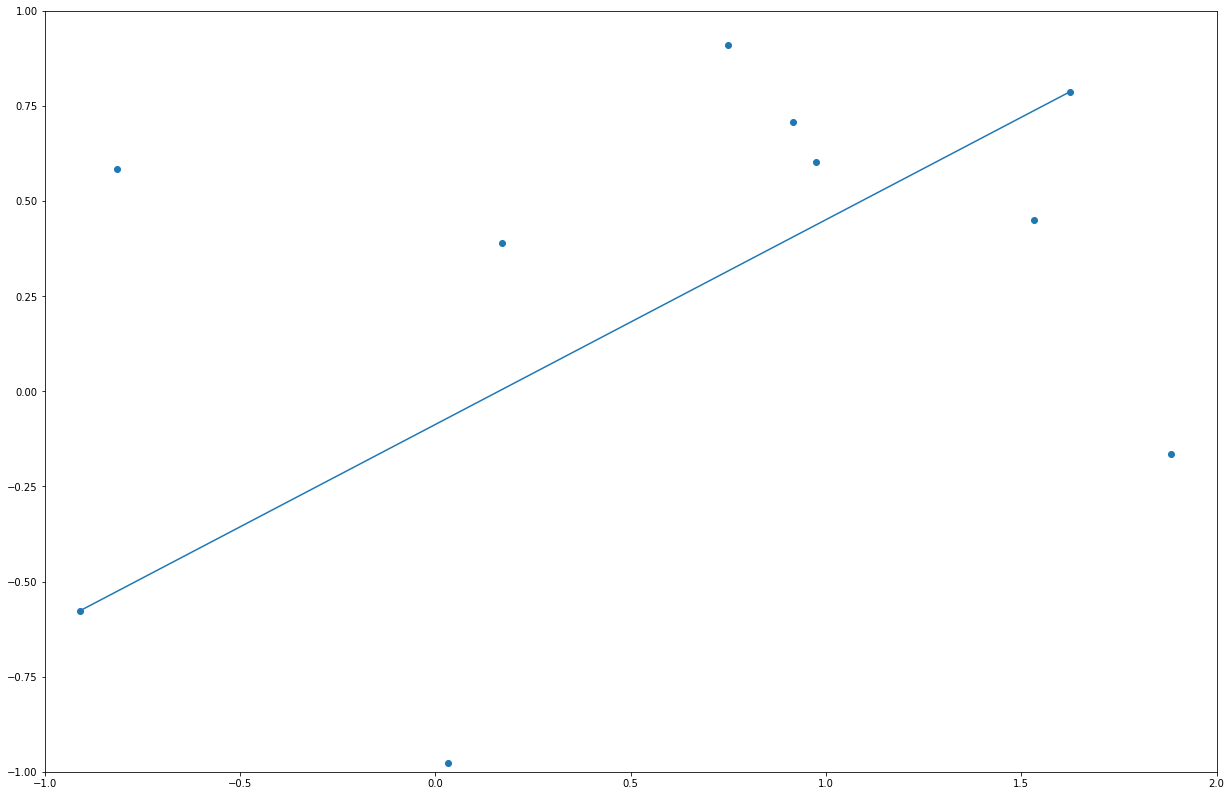

In [9]:
second_pic(data, x_lim,y_lim, index)

In [10]:
mass_centr = np.sum(data, axis=0)/N
mass_centr

array([0.61573826, 0.27130822])

In [11]:
data[0]

array([0.91659536, 0.70644243])

In [19]:
def rotate_point (point, center, angle):
    """
    Поворот точек point относительно center на угол angle
    angle в радианах и angle лежит в (-pi/2 , pi/2)
    """
    ox = (point[:,0] - center[0])*np.cos(angle) - (point[:,1]- center[1])*np.sin(angle) + center[0]
    oy = (point[:,0] - center[0])*np.sin(angle) + (point[:,1]- center[1])*np.cos(angle) + center[1]
    return np.vstack((ox,oy)).T

def find_angle(data, index_max):
    """
    Функция ищет угол наклона [-pi/2, pi/2] отрезка порожденного индексами index_max
    """
    return np.arctan((data[index_max[1],1] -data[index_max[0],1])/ (data[index_max[1],0] -data[index_max[0],0]))


In [23]:
angle = find_angle(data, index)
# умножаем угол на -1
rdata = rotate_point(data, data[index[0]], -1*angle)

In [24]:
def test_third_pic(rdata, index_max, title = ""):
    """
    Рисует точки и отрезок после поворота
    """
#     print(rdata)
    fig, ax = plt.subplots()
    ax.scatter(rdata[:,0],rdata[:,1])
    ax.plot([rdata[index_max[0],0], rdata[index_max[1],0]], [rdata[index_max[0],1], rdata[index_max[1],1]])

[[ 1.3066403  -0.31257442]
 [-0.91033035 -0.57699889]
 [ 1.72742867 -0.82936151]
 [ 1.96792824 -0.57699889]
 [ 0.49868736 -0.23897346]
 [-0.27019265 -1.37657722]
 [ 1.30879267 -0.43096764]
 [ 1.25665627 -0.05323536]
 [-0.27690658  0.40124212]
 [ 1.74635095 -1.53730739]]


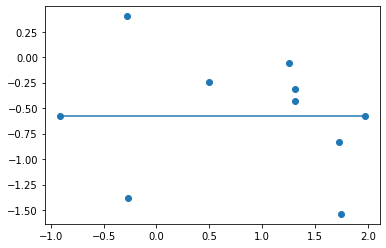

In [26]:
test_third_pic(rdata, index)

In [27]:
data[index[1]], rdata[index[1]]

(array([1.62422339, 0.78696954]), array([ 1.96792824, -0.57699889]))

In [28]:
[rdata[i] for i in index]

[array([-0.91033035, -0.57699889]), array([ 1.96792824, -0.57699889])]

In [29]:
def vertical_segments(rdata):
    """
    Функция находит индексы точек с имнимальным и максимальным значениями по оси y 
    """
    return np.argmin(rdata,axis=0)[1], np.argmax(rdata,axis=0)[1]
    

In [30]:
v_index = vertical_segments(rdata)
v_index

(9, 8)

In [31]:
[rdata[i] for i in v_index]

[array([ 1.74635095, -1.53730739]), array([-0.27690658,  0.40124212])]

In [32]:
def vertical_perpendiculars(rdata, index_max):
    """
    Функция возвращает 2 отрезка, перпендикуляры максимальной длины, к горизонтальному отрезку,
    который задан индексами undex_max
    """
    v_index = vertical_segments(rdata)
    seg1 = np.array([rdata[v_index[0]], [rdata[v_index[0],0], rdata[index_max[0],1]]])
    seg2 = np.array([rdata[v_index[1]], [rdata[v_index[1],0], rdata[index_max[0],1]]])
    return seg1, seg2
    

In [35]:
def third_pic(rdata, index_max, segments):
    fig, ax = plt.subplots()
    ax.scatter(rdata[:,0],rdata[:,1])
    ax.plot([rdata[index_max[0],0], rdata[index_max[1],0]], [rdata[index_max[0],1], rdata[index_max[1],1]])
    ax.plot(segments[0][:,0], segments[0][:,1], color ='red')
    ax.plot(segments[1][:,0], segments[1][:,1], color ='red')

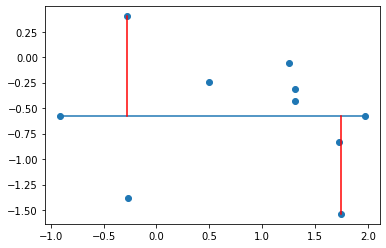

In [36]:
seg1, seg2 = vertical_perpendiculars(rdata, index)
third_pic(rdata, index, (seg1,seg2))